# 네이버전체리뷰 - tokens 컬럼 2개 분리(명사/형,부)

In [1]:
import pandas as pd
import re
from konlpy.tag import Komoran



In [3]:
df = pd.read_csv('/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/naver_review_final.csv', encoding = 'utf-8')

In [4]:
df

,platform,store_name,review_text,review_text_preprocess,review_text_len,additional_info,review_date,classification_result
0,네이버,홍콩반점0410 잠실새내점,가본 홍콩반점 중에 제일 깔끔하고 맛있어요!! 진짜 매장이 넓고 깔끔하고 대형스크린...,가본 홍콩반점 중에 제일 깔끔하고 맛있어요 진짜 매장이 넓고 깔끔하고 대형스크린도 ...,230,"음식이 맛있어요, 양이 많아요, 가성비가 좋아요, 친절해요, 혼밥하기 좋아요",2024-06-27,1
1,네이버,홍콩반점0410 잠실새내점,홍콩반점0410 잠실새내점 음식들이 하나같이 양도 많고 너무 맛있었습니다 ~~🤩🤩🤩...,홍콩반점0410 잠실새내점 음식들이 하나같이 양도 많고 너무 맛있었습니다 야구경기...,114,"음식이 맛있어요, 재료가 신선해요, 양이 많아요, 가성비가 좋아요",2024-06-23,1
2,네이버,홍콩반점0410 잠실새내점,진짜 간만에 홍콩반점갔는데 짜장면 너무 맛나요ㅠ 소스랑 재료가 푸짐해서 남은 짜장소...,진짜 간만에 홍콩반점갔는데 짜장면 너무 맛나요ㅠ 소스랑 재료가 푸짐해서 남은 짜장소...,282,"음식이 맛있어요, 가성비가 좋아요, 친절해요, 매장이 청결해요",2024-05-28,1
3,네이버,홍콩반점0410 잠실새내점,잠실야구장 맛집 홍콩반점0410 잠실새내점 방문했어요!! 매장 인테리어 깔끔하고 대...,잠실야구장 맛집 홍콩반점0410 잠실새내점 방문했어요 매장 인테리어 깔끔하고 대형 ...,219,"음식이 맛있어요, 재료가 신선해요, 양이 많아요, 가성비가 좋아요",2024-06-22,1
4,네이버,홍콩반점0410 잠실새내점,가성비 대박! 맛은 웬만하고 특히나 탕수육 양이 많아요:) 사이즈가 가장 작은 소인...,가성비 대박 맛은 웬만하고 특히나 탕수육 양이 많아요 사이즈가 가장 작은 소인데도 ...,108,"음식이 맛있어요, 양이 많아요, 가성비가 좋아요, 혼밥하기 좋아요",2024-07-29,1
...,...,...,...,...,...,...,...,...
26390,네이버,홍콩반점0410 사가정역점,늘 맛있습니다,늘 맛있습니다,7,음식이 맛있어요,2023-11-01,1
26391,네이버,홍콩반점0410 사가정역점,가성비 좋아요,가성비 좋아요,7,"음식이 맛있어요, 가성비가 좋아요",2023-09-24,1
26392,네이버,홍콩반점0410 사가정역점,맛있어요,맛있어요,4,"음식이 맛있어요, 혼밥하기 좋아요, 친절해요",2024-02-14,1
26393,네이버,홍콩반점0410 사가정역점,"역시 탕수육은 홍콩반점이야~👍고기 냄새 안나서 좋고, 찹쌀가루 입히 탕수육은 쫄깃쫄...",역시 탕수육은 홍콩반점이야고기 냄새 안나서 좋고 찹쌀가루 입히 탕수육은 쫄깃쫄깃하고...,75,"음식이 맛있어요, 재료가 신선해요",2023-09-11,1


In [5]:
komoran = Komoran(userdic="./data/combined_unique.dic")

java.io.FileNotFoundException: ./data/combined_unique.dic (No such file or directory)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:219)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:158)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:112)
	at java.base/java.io.FileReader.<init>(FileReader.java:60)
	at kr.co.shineware.nlp.komoran.core.Komoran.setUserDic(Komoran.java:616)


In [6]:
# 명사 / 형부 토큰 컬럼 분리해서 생성
from tqdm import tqdm

def extract_tokens(sentence):
    try:
        tokens = komoran.pos(sentence)
        # 명사 토큰 추출
        nouns = [x[0] for x in tokens if x[1] in ("NNG", "NNP", "NF", "NP")]
        # 형용사/부사 토큰 추출
        adjv = [x[0] for x in tokens if x[1] in ("MAG", "VA", "VV", "MAJ", "MM")]
        return nouns, adjv
    except Exception as e:
        print(e, sentence)
        return [], []

In [7]:
tqdm.pandas()

# 명사 토큰과 형용사/부사 토큰을 각각의 컬럼에 저장
df["tokens_n"], df["tokens_adjv"] = zip(*df["review_text_preprocess"].progress_apply(lambda x: extract_tokens(x)))

  1%|▎                                    | 182/26395 [00:00<00:26, 1001.87it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


  2%|▌                                     | 425/26395 [00:00<00:41, 630.39it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


  3%|█▏                                   | 890/26395 [00:00<00:19, 1292.68it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
java.lang.NullPointerException: Cannot invoke "java.lang.Integer.intValue()" because the return value of "kr.co.shineware.util.common.model.Pair.getFirst()" is null    
phrase input should be string, not <class 'float'> nan


  6%|██▏                                 | 1572/26395 [00:01<00:14, 1723.78it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


  9%|███▍                                | 2498/26395 [00:01<00:09, 2622.80it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 13%|████▌                               | 3356/26395 [00:01<00:07, 3050.23it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 18%|██████▌                             | 4781/26395 [00:02<00:04, 4610.70it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 23%|████████▏                           | 6023/26395 [00:02<00:04, 4814.16it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 28%|█████████▉                          | 7280/26395 [00:02<00:03, 4855.28it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte 나에게 짜장면은 홍콩반점  이라고 했던 시절이 그리워서 오랜만에 방문한 홍콩밤점 경희대점 𖤐 홍콩반점 짜장면 특유의 달짝지근한 맛과 탕수육의 투명한 찹쌀옷이 좋아서 단골이었었는데 짜장면은 사알짝 맛이 변한거 같기도 이래도 사실 다 먹음 ㅎ 탕수육은 언제 이렇게 비싸진걸까 소자 양이 가격대비 적은 느낌이지만 그래도 맛있긴하다 짜탕면 먹는게 가성비는 좋을지도 그래도 혼밥하기엔 정말 이만한 곳은 없을거 같음 먹는 내내 혼밥러들이 들어오더라 참고로 여기 선불임 
phras

 30%|██████████▋                         | 7826/26395 [00:02<00:04, 4045.81it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 35%|████████████▋                       | 9313/26395 [00:03<00:03, 4340.86it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 39%|█████████████▋                     | 10298/26395 [00:03<00:03, 4293.39it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 43%|███████████████                    | 11327/26395 [00:03<00:04, 3743.73it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 47%|████████████████▍                  | 12379/26395 [00:03<00:03, 3970.81it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 51%|█████████████████▉                 | 13509/26395 [00:04<00:02, 4707.47it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
<built-in method __subclasscheck__ of _jpype._JClass object at 0x11d021550> returned a result with an exception set   
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
<

 56%|███████████████████▍               | 14693/26395 [00:04<00:02, 4564.74it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 62%|█████████████████████▊             | 16481/26395 [00:04<00:01, 6296.19it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 67%|███████████████████████▍           | 17712/26395 [00:05<00:02, 3451.81it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte 탕수육 크기도 적당하고 맛나요 𖤐
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be 

 69%|████████████████████████▏          | 18238/26395 [00:05<00:02, 3731.86it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 74%|█████████████████████████▊         | 19461/26395 [00:05<00:01, 4126.34it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 78%|███████████████████████████▍       | 20710/26395 [00:05<00:01, 4925.36it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

 81%|████████████████████████████▏      | 21275/26395 [00:06<00:01, 4087.96it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 85%|█████████████████████████████▋     | 22374/26395 [00:06<00:01, 3538.38it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 90%|███████████████████████████████▍   | 23733/26395 [00:06<00:00, 3831.10it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan


 96%|█████████████████████████████████▋ | 25361/26395 [00:06<00:00, 5749.94it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

100%|███████████████████████████████████| 26395/26395 [00:07<00:00, 3717.22it/s]

phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase input should be string, not <class 'float'> nan
phrase inp

### **네이버 부정 리뷰 컨텐츠 방연 전**

In [8]:
df["review_date"] = pd.to_datetime(df["review_date"])

In [9]:
before_df = df[(df["review_date"] < "2024-06-03") & (df["classification_result"] == -1)]

In [10]:
after_df = df[(df["review_date"] >= "2024-06-03") & (df["classification_result"] == -1)]

In [11]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n = before_df['tokens_n'].tolist()

In [12]:
sentences_n

[['모델링',
  '후',
  '오픈',
  '을해',
  '그런지',
  '매장',
  '키오스크',
  '주문',
  '후',
  '결제',
  '시스템',
  '주문',
  '후',
  '메뉴',
  '퇴식',
  '셀프',
  '제일',
  '음식',
  '짬뽕',
  '탕수육',
  '짜',
  '장',
  '담',
  '면',
  '발',
  '부탁'],
 ['면', '삶', '아진', '복불복'],
 ['오픈',
  '그전',
  '홍콩',
  '반점',
  '이랑',
  '맛',
  '비교',
  '실망',
  '고추',
  '짬뽕',
  '짬뽕',
  '맛',
  '면',
  '시판',
  '면',
  '시',
  '건지',
  '밀가루',
  '맛',
  '입맛'],
 [],
 [],
 ['홍콩',
  '반점',
  '곳',
  '여기',
  '짬뽕',
  '짜장면',
  '면',
  '밀가루',
  '냄새',
  '신촌',
  '홍대',
  '지점',
  '곳',
  '맛',
  '관리',
  '안',
  '여기',
  '신촌',
  '홍대',
  '지점'],
 ['홍콩',
  '반점',
  '짬뽕',
  '근처',
  '매장',
  '마음',
  '지금',
  '홍콩',
  '반점',
  '짬뽕',
  '기름기',
  '제일',
  '돼지',
  '탕',
  '면',
  '느낌',
  '홍콩',
  '반점',
  '특유',
  '짬뽕',
  '맛',
  '맛',
  '물',
  '컵',
  '염',
  '도가',
  '체인점',
  '근처',
  '홍대입구역',
  '맛',
  '차이',
  '나니',
  '본사',
  '관리',
  '필요',
  '본사',
  '의견',
  '여기',
  '글',
  '짬뽕',
  '리뷰',
  '염',
  '개선'],
 ['짬뽕', '짜장면', '짬뽕', '기름', '둥둥', '면도', '오픈', '해서'],
 ['세트', '메뉴', '오픈', '얼마'],
 ['추가', '공기', '밥', '정도',

In [26]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습 (Skip-gram 방식)
model = Word2Vec(sentences_n, vector_size=32, window=10, sg=1, min_count=2, workers=4)

In [28]:
if '홍콩반점' in model.wv:
    print("홍콩반점이 어휘에 있습니다.")
else:
    print("홍콩반점이 어휘에 없습니다.")

홍콩반점이 어휘에 없습니다.


In [41]:
# 특정 단어와 유사한 단어 찾기
similar_words = model.wv.most_similar('백종원', topn=200)
print(similar_words)

[('체인점', 0.9926028847694397), ('지금', 0.9910129308700562), ('곳', 0.9907532334327698), ('해산물', 0.9904423952102661), ('이번', 0.9904322624206543), ('최악', 0.9904063940048218), ('매력', 0.9894814491271973), ('하루', 0.9893157482147217), ('레시', 0.9891673922538757), ('차이', 0.9885713458061218), ('자체', 0.9884216785430908), ('양배추', 0.9882488250732422), ('가나', 0.9882338643074036), ('중', 0.9879947900772095), ('기존', 0.9879552721977234), ('고민', 0.9877985715866089), ('값', 0.9877427816390991), ('껍데기', 0.9876018166542053), ('어제', 0.9873677492141724), ('땅', 0.9873638153076172), ('당근', 0.9873465895652771), ('동네', 0.9873027801513672), ('전체', 0.9871956706047058), ('머', 0.9871501922607422), ('청결', 0.9871066808700562), ('시즌', 0.987095296382904), ('덩어리', 0.9870063066482544), ('대비', 0.9869808554649353), ('기대', 0.9868895411491394), ('알', 0.9867400527000427), ('티', 0.9866910576820374), ('부실', 0.9865826368331909), ('집중', 0.9865577220916748), ('빈', 0.9863932132720947), ('인근', 0.9863107800483704), ('라면', 0.98624837398529

In [42]:
# tokens_adjv 컬럼의 데이터를 리스트 형태로 사용
sentences_adjv = before_df['tokens_adjv'].tolist()

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None, min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_adjv)

# 단어별 TF-IDF 스코어 확인
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

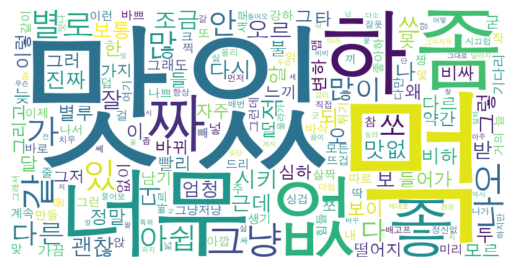

In [43]:
# 워드투백터와 tf-idf 모두 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF 스코어를 기반으로 워드 클라우드 생성
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(tfidf_scores)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

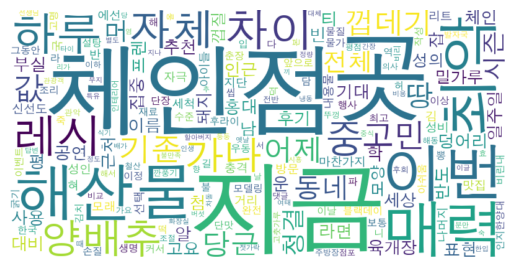

In [44]:
# 워드투백터만 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word2Vec 유사도 점수를 기반으로 워드 클라우드 생성
similar_words_dict = dict(similar_words)  # Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환

word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(similar_words_dict)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **네이버 부정 리뷰 컨텐츠 방연 후**

In [18]:
# tokens_n 컬럼의 데이터를 그대로 리스트 형태로 사용
sentences_n = after_df['tokens_n'].tolist()

In [19]:
sentences_n

[['오픈',
  '한지',
  '얼마',
  '안',
  '매장',
  '쟁반',
  '배식구',
  '이서',
  '쟁반',
  '밥',
  '조금',
  '쟁반',
  '회전',
  '짬뽕국물',
  '배식',
  '퇴식',
  '손님',
  '결정',
  '퇴식',
  '구',
  '반납',
  '직원',
  '인사'],
 ['시장', '안', '홍콩반점', '여기', '홍콩반점', '이랑', '탕수육', '반접시'],
 ['이'],
 ['짜장면', '탕수육'],
 ['일요일', '중화요리', '넘', '기본', '맛', '사실', '맛', '내', '제가', '넘'],
 ['맛', '탕수육', '처음', '카운터', '여자', '인성', '문제', '손님', '잘못', '사과', '한마디', '인성'],
 ['체인점',
  '기본',
  '이상',
  '생각',
  '처음',
  '방문',
  '완전',
  '공복',
  '이면',
  '뭐',
  '텐',
  '물',
  '제일',
  '컵',
  '립스틱',
  '자국',
  '자장면',
  '짬뽕',
  '탕수육',
  '자장면',
  '짬뽕',
  '탕수육',
  '떡',
  '소스',
  '무엇',
  '공장',
  '음식',
  '머리카락',
  '보지',
  '환불',
  '음식',
  '대처',
  '방식',
  '사과',
  '맛',
  '서비스',
  '필요',
  '음식',
  '곳',
  '일부',
  '환불',
  '안',
  '리뷰',
  '겁',
  '니다'],
 ['음식',
  '데스크',
  '알바',
  '녀',
  '폰',
  '손님',
  '손',
  '안',
  '주방장',
  '정도',
  '맛',
  '알바',
  '녀',
  '분위기',
  '손님',
  '근무',
  '시간',
  '폰',
  '알바',
  '인간',
  '러'],
 ['여기',
  '지점',
  '처음',
  '방문',
  '홍콩반점',
  '자체',
  '짬뽕',
  '레시피',
  '물

In [20]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습 (Skip-gram 방식)
model = Word2Vec(sentences_n, vector_size=32, window=10, sg=1, min_count=2, workers=4)

In [37]:
# 특정 단어와 유사한 단어 찾기
similar_words = model.wv.most_similar('백종원', topn=200)
print(similar_words)

[('체인점', 0.9926028847694397), ('지금', 0.9910129308700562), ('곳', 0.9907532334327698), ('해산물', 0.9904423952102661), ('이번', 0.9904322624206543), ('최악', 0.9904063940048218), ('매력', 0.9894814491271973), ('하루', 0.9893157482147217), ('레시', 0.9891673922538757), ('차이', 0.9885713458061218), ('자체', 0.9884216785430908), ('양배추', 0.9882488250732422), ('가나', 0.9882338643074036), ('중', 0.9879947900772095), ('기존', 0.9879552721977234), ('고민', 0.9877985715866089), ('값', 0.9877427816390991), ('껍데기', 0.9876018166542053), ('어제', 0.9873677492141724), ('땅', 0.9873638153076172), ('당근', 0.9873465895652771), ('동네', 0.9873027801513672), ('전체', 0.9871956706047058), ('머', 0.9871501922607422), ('청결', 0.9871066808700562), ('시즌', 0.987095296382904), ('덩어리', 0.9870063066482544), ('대비', 0.9869808554649353), ('기대', 0.9868895411491394), ('알', 0.9867400527000427), ('티', 0.9866910576820374), ('부실', 0.9865826368331909), ('집중', 0.9865577220916748), ('빈', 0.9863932132720947), ('인근', 0.9863107800483704), ('라면', 0.98624837398529

In [38]:
# tokens_adjv 컬럼의 데이터를 리스트 형태로 사용
sentences_adjv = after_df['tokens_adjv'].tolist()

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None, min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_adjv)

# 단어별 TF-IDF 스코어 확인
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

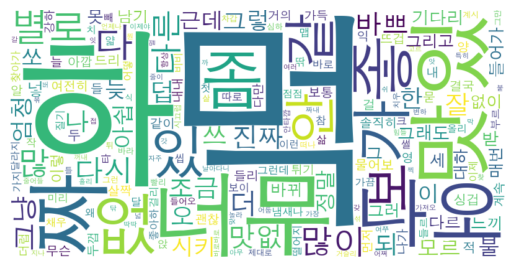

In [39]:
# 워드투백터와 tf-idf 모두 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF 스코어를 기반으로 워드 클라우드 생성
word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(tfidf_scores)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

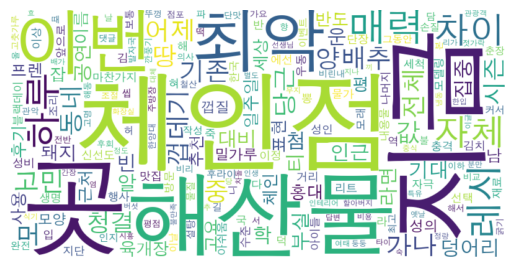

In [40]:
# 워드투백터만 사용해서 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word2Vec 유사도 점수를 기반으로 워드 클라우드 생성
similar_words_dict = dict(similar_words)  # Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환

word_cloud = WordCloud(
    font_path = "/Library/Fonts/AppleGothic.ttf",  # 한글 폰트 경로 설정
    background_color='white',
    colormap='viridis',  # 원하는 컬러맵을 사용할 수 있습니다
    width=800,
    height=400
).generate_from_frequencies(similar_words_dict)

# 워드 클라우드 시각화
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **다른 방식의 시각화**

In [25]:
### 전
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설정
font_path = "/Library/Fonts/AppleGothic.ttf", # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 예제 코드 (앞서 작성한 코드)
import heapq

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 막대 그래프 시각화
plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Words by Similarity Score')
plt.xlim(0.9, 1.0)  # x축 범위를 0.9부터 1.0으로 설정
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 역순으로 정렬
plt.show()


TypeError: expected str, bytes or os.PathLike object, not tuple

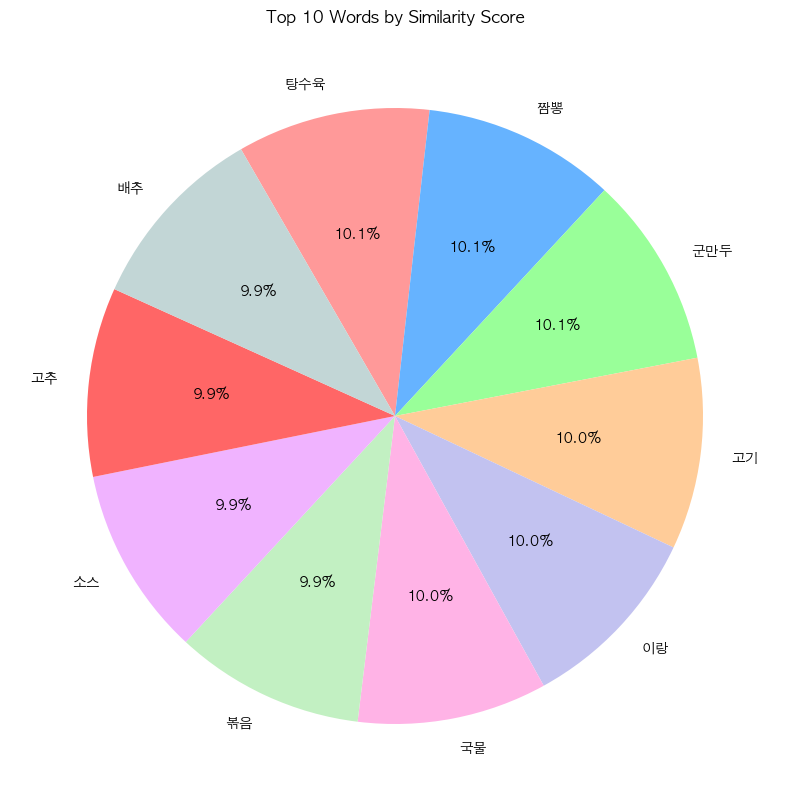

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import heapq

# 폰트 파일 경로 설정
font_path = "/Library/Fonts/AppleGothic.ttf"  # 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

# 폰트 패밀리 설정
plt.rcParams['font.family'] = 'AppleGothic'

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 사용자 정의 색상 목록
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', 
                 '#c2f0c2', '#f0b3ff', '#ff6666', '#c2d6d6']

# 파이 차트 시각화 (시계방향, 사용자 정의 색상 적용)
plt.figure(figsize=(10, 10))
plt.pie(scores, labels=words, autopct='%1.1f%%', startangle=120, colors=custom_colors, counterclock=False)
plt.title('Top 10 Words by Similarity Score')
plt.show()


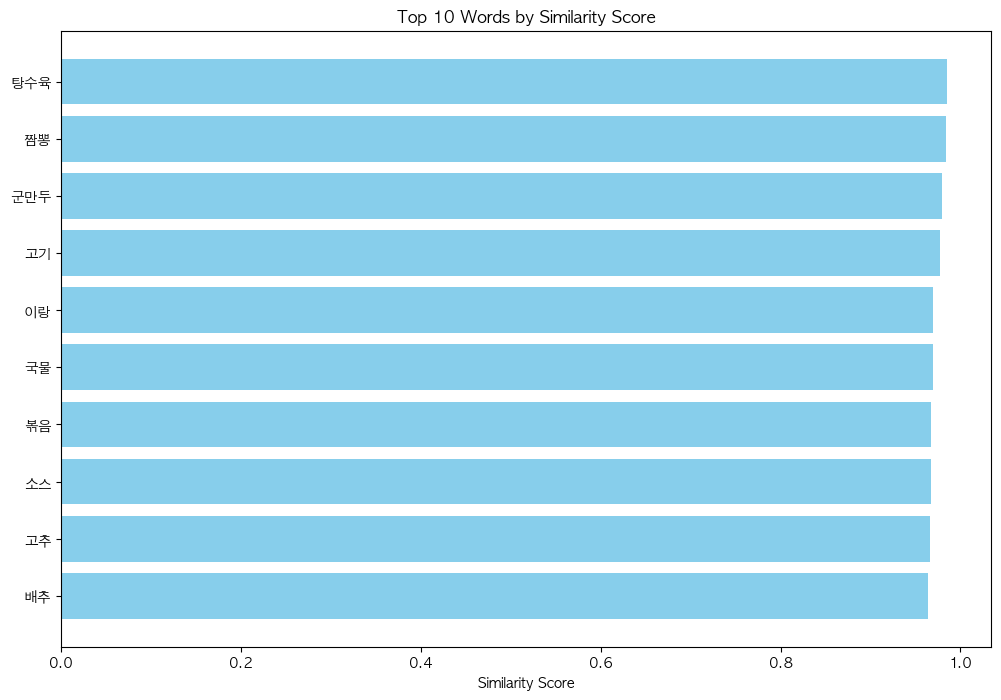

In [23]:
### 후
import matplotlib.pyplot as plt
import heapq

# Word2Vec 유사 단어와 유사도 점수를 딕셔너리로 변환 (이미 변환됨)
similar_words_dict = dict(similar_words)

# 유사도 점수 기준으로 상위 10개 단어 추출
top_n = 10
top_words = heapq.nlargest(top_n, similar_words_dict.items(), key=lambda item: item[1])
words, scores = zip(*top_words)  # 튜플을 언패킹하여 단어와 점수 리스트를 만듭니다

# 막대 그래프 시각화
plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Words by Similarity Score')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 역순으로 정렬
plt.show()